#### Loading Library

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#### Loading Dataset and Preprocessing

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Building the model

In [4]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 1D array
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout layer for regularization
model.add(layers.Dense(10, activation='softmax'))  # 10 output units for 10 digits

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


1875/1875 [==============================] - 18s 8ms/step - loss: 0.3041 - accuracy: 0.9125 - val_loss: 0.1411 - val_accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1497 - accuracy: 0.9554 - val_loss: 0.1114 - val_accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1103 - accuracy: 0.9671 - val_loss: 0.0858 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0902 - accuracy: 0.9724 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0781 - accuracy: 0.9754 - val_loss: 0.0768 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0673 - accuracy: 0.9786 - val_loss: 0.0761 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0605 - accuracy: 0.9808 - val_loss: 0.0732 - val_

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0727 - accuracy: 0.9798
Test Accuracy: 0.9797999858856201


#### Plot the train history

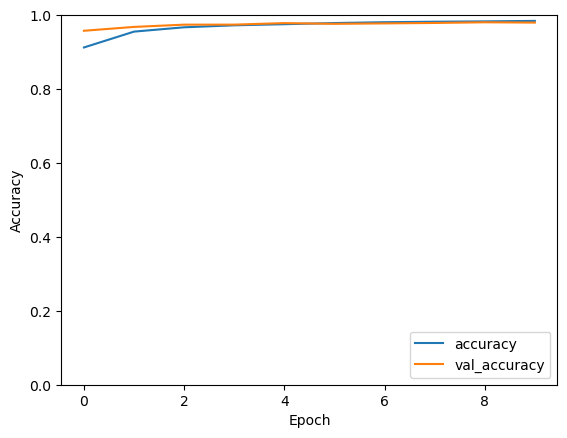

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#### Displaying Output

In [9]:
# Make predictions on a few test images
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 299ms/step


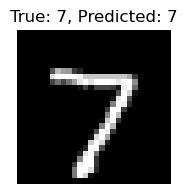

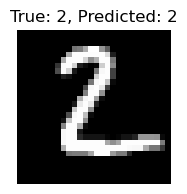

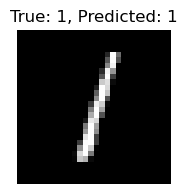

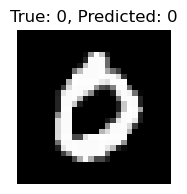

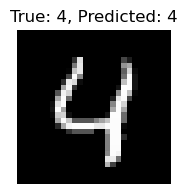

In [10]:
# Display the images along with their predicted and true labels
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {test_labels[i]}, Predicted: {tf.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()